In [2]:
import spacy
from spacy_langdetect import LanguageDetector
from spacy.lang.tr.stop_words import STOP_WORDS
import pandas as pd
import re
import string

In [3]:
import spacy
nlp = spacy.load("tr_core_news_lg")

doc = nlp("Dün ben de gittim.")

for token in doc:
    # Her token için istediğiniz işlemi gerçekleştirin
    print(token.text, token.lemma_, token.pos_, token.tag_)

Dün dün ADV Noun
ben ben PRON Pers
de de CCONJ Conj
gittim git VERB Verb
. . PUNCT Punc


In [4]:
dataset = pd.read_json("..\dataset\Turkish_data_depository_630koseyazisi.jsonl", lines=True)
print(dataset.head())

  writer  file_id                                             column
0    ttu       27  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
1    ttu       28  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
2    ttu        3  Cumhuriyetin en kritik yerel seçimi \r\nMURAT ...
3    ttu        4  Çekilin artık kamera karşısından \r\nHER kar y...
4    ttu       23  Lorant'ın heyecan veren hedefi  \r\n     \r\n\...


In [5]:
x = dataset["column"].astype(str)
y = dataset["writer"].astype(str)

index = 3
print(f"{index}.yazar : {y[index]} \n{index}.yazı : {x[index]}")

3.yazar : ttu 
3.yazı : Çekilin artık kamera karşısından 
HER kar yağışında böyle olur. İstanbullular hep birlikte aynı tiyatroyu oynarlar. 

Vatandaşlar yolları tıkamak için her şeyi yaparlar. 

Günlük güneşlik havada bile doğru dürüst araç kullanamayanlar karda direksiyon başına geçip olmadık gösteriler yapmaya kalkarlar. 

Hemen hiç kimse kar lastiği, zincir kullanmaz. Kayıp bir başka araca ya da yolun korkuluklarına bindirirler ve yolu tıkarlar. 

Bazıları da uyanıklık yapıp ters yola girerler. 

Kimilerinin de benzinleri bittiği için yolda kalırlar. 

Çoğunlukla belediye ekipleri tam siper olurlar. 

Trafikçiler de öyle... 

Karayolları ekipleri ise Kent içi yollar beni ilgilendirmez diye üslerinden çıkmazlar. 

İstanbul'u yönetenler ne yapar? 

Onların hiç değişmeyen işleri vardır. Onlar kanal kanal dolaşıp alınan sanal önlemleri ballandıra ballandıra anlatırlar. 

Halkı soğukkanlı hareket etmeye çağırır, her şeyin kontrol altında olduğunu söylerler.

(Uygar ülkelerde bu işi 

In [15]:

for i in range(len(x)):
    # küçük harfe çevirme
    x[i] = x[i].lower()
    
    # kaçış karakterlerini temizleme
    x[i] = re.sub(r'[\r\n]', ' ', x[i])
    
    # Remove punctuation marks - Noktalama işaretlerini kaldırma
    x[i] = x[i].translate(str.maketrans('', '', string.punctuation))
    
    # stop word'leri temizleme
    x[i] = ' '.join([word for word in x[i].split() if word not in STOP_WORDS])
    
    # Remove unnecessary characters - Gereksiz karakterleri kaldırma
    x[i] = re.sub(r'[^a-zA-ZğüşıöçĞÜŞİÖÇ\s]', '', x[i])
    
    # Remove repeating spaces - Tekrar eden boşlukları kaldırma
    x[i] = re.sub(r'\s+', ' ', x[i])
    

In [16]:
index = 3
print(f"{index}.yazar : {y[index]} \n{index}.yazı : {x[index]}")

3.yazar : ttu 
3.yazı : çekil kamera karşı kar yağış istanbullu aynı tiyatro oynarla vatandaşlar yol tıka yaparlar günlük güneş hava dürüst araç kullanamayanlar kar direksiyon baş geç olmadık gösteri yap kalkarlar hemen kar lastik zincir kullan kayıp bir araca yolun korkuluk bindirirle yol tıkar bazı uyanık yap ters yol girerler kimi benzin bittiği yol kalırlar belediye ekip siper ol trafikçi karayol ekip kent iç yol ilgilendirmez üs çıkmazlar istanbulu yöneten yap değiş iş var i kanal kanal dolaş alın sanal önlem ballandıra ballandıra anlatır halk soğukkan hareket et çağır şey kontrol alt söyle uygar ülke iş yönetici görevlendir sözcü yap belli aralık sözcü ba açıkla yap bilgi ver yetkili tv açıkla saat a plan b plan c plan sun önlem tüm iflas et halk sokak perişan ol kent allaha emanet edilmiştir tiyatro gazeteci yıl seyrederim değiş bir sonra kar aynı facia yaşa taşra görev gazeteci arkadaş çek çile ciddi almazlar istanbula kar yağınca ortalık kat sayfa yap anadoluyu kar kaplas sel 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# BoW (Bag of Words) vektörlerini oluşturma
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(x)

# TF-IDF vektörlerini oluşturma
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(x)

# Vektörlerin boyutlarını kontrol etme
print("BoW vektörleri boyutu:", bow_vectors.shape)
print("TF-IDF vektörleri boyutu:", tfidf_vectors.shape)



BoW vektörleri boyutu: (630, 34907)
TF-IDF vektörleri boyutu: (630, 34907)


# SVM

SVM Modeli Doğruluğu: 0.6746031746031746


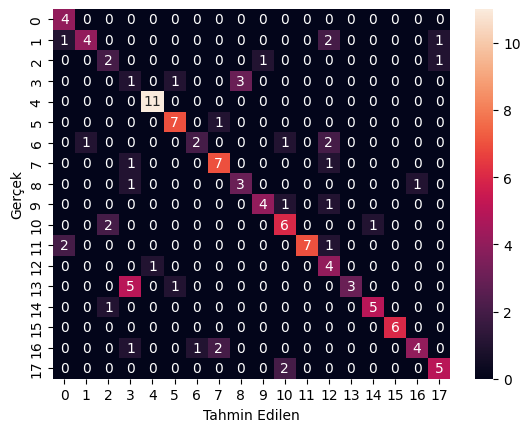

              precision    recall  f1-score   support

         aar       0.57      1.00      0.73         4
         bco       0.80      0.50      0.62         8
         cul       0.40      0.50      0.44         4
         cun       0.11      0.20      0.14         5
         ebr       0.92      1.00      0.96        11
         gur       0.78      0.88      0.82         8
         hin       0.67      0.33      0.44         6
         kaz       0.70      0.78      0.74         9
         lev       0.50      0.60      0.55         5
         msa       0.80      0.67      0.73         6
         oek       0.60      0.67      0.63         9
         psu       1.00      0.70      0.82        10
         sav       0.36      0.80      0.50         5
         tal       1.00      0.33      0.50         9
         ttu       0.83      0.83      0.83         6
         tug       1.00      1.00      1.00         6
         ved       0.80      0.50      0.62         8
         yba       0.71    

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Verileri eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(tfidf_vectors, y, test_size=0.2, random_state=42)

# Destek Vektör Makinesi (SVM) modelini oluşturma ve eğitme
svm_model = SVC(kernel='sigmoid',C=1,gamma=10,max_iter=500)
svm_model.fit(x_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Modeli Doğruluğu:", accuracy)

# karar ağacı modelinin performansını görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Sınıflandırma raporunu görüntüleme
class_report = classification_report(y_test, y_pred)
print(class_report)